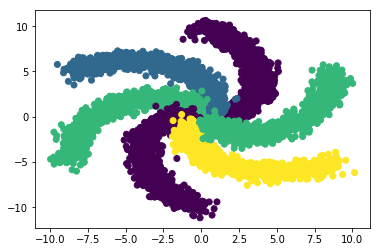

In [5]:
## Creating Data
import numpy as np
import matplotlib.pyplot as plt
def get_spiral():
    # Idea: radius -> low...high
    #           (don't start at 0, otherwise points will be "mushed" at origin)
    #       angle = low...high proportional to radius
    #               [0, 2pi/6, 4pi/6, ..., 10pi/6] --> [pi/2, pi/3 + pi/2, ..., ]
    # x = rcos(theta), y = rsin(theta) as usual

    radius = np.linspace(1, 10, 1000)
    thetas = np.empty((6, 1000))
    for i in range(6):
        start_angle = np.pi*i / 3.0
        end_angle = start_angle + np.pi / 2
        points = np.linspace(start_angle, end_angle, 1000)
        thetas[i] = points

    # convert into cartesian coordinates
    x1 = np.empty((6, 1000))
    x2 = np.empty((6, 1000))
    for i in range(6):
        x1[i] = radius * np.cos(thetas[i])
        x2[i] = radius * np.sin(thetas[i])

    # inputs
    X = np.empty((6000, 2))
    X[:,0] = x1.flatten()
    X[:,1] = x2.flatten()

    # add noise
    X += np.random.randn(6000, 2)*0.5

    # targets
    Y = np.array([0]*1000 + [1]*1000 + [2]*1000 + [0]*1000 + [3]*1000 + [2]*1000)
    return X, Y

X,y=get_spiral()

plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

## Processing the Data

def one_hot_encoder(X):
    N=X.shape[0]
    K=len(np.unique(X))
    Z=np.zeros((N,K))
    for i in range(N):
        c=int(X[i])
        Z[i,c]=1
    return Z
y_i=one_hot_encoder(y)

def standardize(X):
    stds=X.std(axis=0)
    means=X.mean(axis=0)
    X=(X-means)/stds
    return X,means,stds

X_s,m,s=standardize(X)

def train_test_split(X,y,size=0.8,rs=None):
    N=len(X)
    np.random.seed(rs)
    tr_i=np.random.choice(N,int(size*N),replace=False)
    t_i=[i for i in range(N) if i not in tr_i]
    X_train=X[tr_i]
    y_train=y[tr_i]
    X_test=X[t_i]
    y_test=y[t_i]
    return X_train,y_train,X_test,y_test
X_train,y_train,X_test,y_test=train_test_split(X_s,y,size=0.9,rs=20)

X_train=X_train.astype(np.float32)
y_train=y_train.astype(np.float32)
X_test=X_test.astype(np.float32)
y_test=y_test.astype(np.float32)

In [1]:
import keras

C:\Users\ytnvj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.models import Sequential

In [3]:
from keras.layers import Activation,Dense,Dropout,BatchNormalization

In [57]:
model=Sequential()

In [58]:
model.add(Dense(units=500,input_dim=X_train.shape[1]))

In [59]:
model.add(Activation('relu'))

In [60]:
model.add(Dense(units=300))

model.add(Activation('relu'))

In [61]:
model.add(Dense(units=len(set(y_train)),activation='softmax'))

In [62]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
hist=model.fit(X_train,one_hot_encoder(y_train),validation_split=0.25,epochs=20,batch_size=290,shuffle=True)

Train on 4050 samples, validate on 1350 samples
Epoch 1/20
4050/4050 [==============================] - 0s 18us/step - loss: 0.0648 - acc: 0.9773 - val_loss: 0.0731 - val_acc: 0.9741
Epoch 2/20
4050/4050 [==============================] - 0s 15us/step - loss: 0.0636 - acc: 0.9768 - val_loss: 0.0674 - val_acc: 0.9748
Epoch 3/20
4050/4050 [==============================] - 0s 16us/step - loss: 0.0612 - acc: 0.9780 - val_loss: 0.0686 - val_acc: 0.9726
Epoch 4/20
4050/4050 [==============================] - 0s 29us/step - loss: 0.0609 - acc: 0.9778 - val_loss: 0.0676 - val_acc: 0.9741
Epoch 5/20
4050/4050 [==============================] - 0s 15us/step - loss: 0.0588 - acc: 0.9788 - val_loss: 0.0646 - val_acc: 0.9770
Epoch 6/20
4050/4050 [==============================] - 0s 15us/step - loss: 0.0579 - acc: 0.9795 - val_loss: 0.0653 - val_acc: 0.9778
Epoch 7/20
4050/4050 [==============================] - 0s 15us/step - loss: 0.0585 - acc: 0.9785 - val_loss: 0.0652 - val_acc: 0.9726
Epoch 8

In [67]:
print(hist.history)

{'val_loss': [0.07305150887480488, 0.06740829514132606, 0.06863438426344483, 0.0676226125271232, 0.0645600776705477, 0.06529278953870138, 0.06522825520347666, 0.06366534586305972, 0.06685756086199372, 0.06434798930530194, 0.06511040087099429, 0.061166154869176724, 0.06434894466289767, 0.06450253324928107, 0.06346513176405871, 0.0663221745579331, 0.06517786976915818, 0.06848606122312723, 0.061740272740523024, 0.061904834983525454], 'val_acc': [0.9740740643607245, 0.9748148198480959, 0.9725925931224116, 0.9740740802552965, 0.9770370368604306, 0.977777776894746, 0.9725925900318004, 0.976296310071592, 0.9748148149914212, 0.9755555497275459, 0.9762962972676312, 0.9770370368604306, 0.9755555545842206, 0.97481481190081, 0.9792592719749168, 0.9748148251462866, 0.97629629417702, 0.9725925851751257, 0.971851850439001, 0.974074070541947], 'loss': [0.0648135841904599, 0.06361558910137341, 0.06124719258075879, 0.06087474416435501, 0.05881975628895524, 0.05787202651485985, 0.05849891776839892, 0.057

In [69]:
from keras.optimizers import RMSprop

In [82]:
model2=Sequential()

In [83]:
model2.add(Dense(units=500,input_dim=X_train.shape[1]))

model2.add(Activation('relu'))

model2.add(Dense(units=300))

model2.add(Activation('relu'))

model2.add(Dense(units=len(set(y_train)),activation='softmax'))

In [84]:
rms=RMSprop(lr=0.01,decay=0.999,epsilon=1e-10,rho=0.95)

In [85]:
model2.compile(optimizer=rms,loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
model2.fit(X_train,one_hot_encoder(y_train),validation_split=0.25,epochs=1000,batch_size=290)

Train on 4050 samples, validate on 1350 samples
Epoch 1/1000
4050/4050 [==============================] - 0s 122us/step - loss: 0.6734 - acc: 0.6874 - val_loss: 0.4904 - val_acc: 0.7600
Epoch 2/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.4649 - acc: 0.7877 - val_loss: 0.4439 - val_acc: 0.7919
Epoch 3/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.4294 - acc: 0.8136 - val_loss: 0.4173 - val_acc: 0.8148
Epoch 4/1000
4050/4050 [==============================] - 0s 24us/step - loss: 0.4071 - acc: 0.8259 - val_loss: 0.3982 - val_acc: 0.8326
Epoch 5/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.3891 - acc: 0.8398 - val_loss: 0.3836 - val_acc: 0.8393
Epoch 6/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.3750 - acc: 0.8496 - val_loss: 0.3709 - val_acc: 0.8496
Epoch 7/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.3628 - acc: 0.8598 - val_loss: 0.3604 - val_acc:

4050/4050 [==============================] - 0s 15us/step - loss: 0.2208 - acc: 0.9398 - val_loss: 0.2245 - val_acc: 0.9370
Epoch 61/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.2200 - acc: 0.9398 - val_loss: 0.2236 - val_acc: 0.9370
Epoch 62/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.2191 - acc: 0.9402 - val_loss: 0.2227 - val_acc: 0.9370
Epoch 63/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.2182 - acc: 0.9410 - val_loss: 0.2218 - val_acc: 0.9363
Epoch 64/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.2174 - acc: 0.9405 - val_loss: 0.2210 - val_acc: 0.9363
Epoch 65/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.2166 - acc: 0.9410 - val_loss: 0.2202 - val_acc: 0.9363
Epoch 66/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.2158 - acc: 0.9415 - val_loss: 0.2194 - val_acc: 0.9363
Epoch 67/1000
4050/4050 [=======================

4050/4050 [==============================] - 0s 15us/step - loss: 0.1873 - acc: 0.9516 - val_loss: 0.1913 - val_acc: 0.9467
Epoch 120/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1870 - acc: 0.9516 - val_loss: 0.1909 - val_acc: 0.9467
Epoch 121/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1866 - acc: 0.9516 - val_loss: 0.1905 - val_acc: 0.9467
Epoch 122/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1862 - acc: 0.9521 - val_loss: 0.1902 - val_acc: 0.9467
Epoch 123/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1859 - acc: 0.9526 - val_loss: 0.1898 - val_acc: 0.9467
Epoch 124/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1855 - acc: 0.9523 - val_loss: 0.1894 - val_acc: 0.9474
Epoch 125/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1852 - acc: 0.9526 - val_loss: 0.1891 - val_acc: 0.9474
Epoch 126/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1704 - acc: 0.9573 - val_loss: 0.1745 - val_acc: 0.9519
Epoch 179/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1702 - acc: 0.9573 - val_loss: 0.1742 - val_acc: 0.9519
Epoch 180/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1700 - acc: 0.9575 - val_loss: 0.1740 - val_acc: 0.9519
Epoch 181/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1698 - acc: 0.9575 - val_loss: 0.1738 - val_acc: 0.9519
Epoch 182/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1696 - acc: 0.9578 - val_loss: 0.1736 - val_acc: 0.9519
Epoch 183/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1694 - acc: 0.9575 - val_loss: 0.1734 - val_acc: 0.9519
Epoch 184/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1691 - acc: 0.9580 - val_loss: 0.1732 - val_acc: 0.9519
Epoch 185/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1597 - acc: 0.9600 - val_loss: 0.1637 - val_acc: 0.9548
Epoch 238/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1595 - acc: 0.9602 - val_loss: 0.1636 - val_acc: 0.9548
Epoch 239/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1594 - acc: 0.9602 - val_loss: 0.1634 - val_acc: 0.9548
Epoch 240/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1592 - acc: 0.9602 - val_loss: 0.1633 - val_acc: 0.9548
Epoch 241/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1591 - acc: 0.9602 - val_loss: 0.1631 - val_acc: 0.9548
Epoch 242/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1589 - acc: 0.9602 - val_loss: 0.1630 - val_acc: 0.9548
Epoch 243/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1588 - acc: 0.9605 - val_loss: 0.1628 - val_acc: 0.9541
Epoch 244/1000
4050/4050 [================

4050/4050 [==============================] - 0s 14us/step - loss: 0.1520 - acc: 0.9630 - val_loss: 0.1561 - val_acc: 0.9548
Epoch 297/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1519 - acc: 0.9630 - val_loss: 0.1560 - val_acc: 0.9548
Epoch 298/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1518 - acc: 0.9632 - val_loss: 0.1558 - val_acc: 0.9548
Epoch 299/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1517 - acc: 0.9632 - val_loss: 0.1557 - val_acc: 0.9548
Epoch 300/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1516 - acc: 0.9632 - val_loss: 0.1556 - val_acc: 0.9548
Epoch 301/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1515 - acc: 0.9635 - val_loss: 0.1555 - val_acc: 0.9548
Epoch 302/1000
4050/4050 [==============================] - 0s 22us/step - loss: 0.1513 - acc: 0.9632 - val_loss: 0.1554 - val_acc: 0.9548
Epoch 303/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1461 - acc: 0.9649 - val_loss: 0.1502 - val_acc: 0.9570
Epoch 356/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1460 - acc: 0.9649 - val_loss: 0.1501 - val_acc: 0.9570
Epoch 357/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1460 - acc: 0.9649 - val_loss: 0.1500 - val_acc: 0.9570
Epoch 358/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1459 - acc: 0.9649 - val_loss: 0.1499 - val_acc: 0.9570
Epoch 359/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1458 - acc: 0.9652 - val_loss: 0.1499 - val_acc: 0.9570
Epoch 360/1000
4050/4050 [==============================] - 0s 25us/step - loss: 0.1457 - acc: 0.9654 - val_loss: 0.1498 - val_acc: 0.9570
Epoch 361/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1456 - acc: 0.9654 - val_loss: 0.1497 - val_acc: 0.9570
Epoch 362/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1414 - acc: 0.9659 - val_loss: 0.1455 - val_acc: 0.9563
Epoch 415/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1413 - acc: 0.9659 - val_loss: 0.1454 - val_acc: 0.9563
Epoch 416/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1413 - acc: 0.9659 - val_loss: 0.1454 - val_acc: 0.9563
Epoch 417/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1412 - acc: 0.9659 - val_loss: 0.1453 - val_acc: 0.9563
Epoch 418/1000
4050/4050 [==============================] - 0s 27us/step - loss: 0.1411 - acc: 0.9659 - val_loss: 0.1452 - val_acc: 0.9563
Epoch 419/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1411 - acc: 0.9659 - val_loss: 0.1452 - val_acc: 0.9563
Epoch 420/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1410 - acc: 0.9659 - val_loss: 0.1451 - val_acc: 0.9563
Epoch 421/1000
4050/4050 [================

4050/4050 [==============================] - 0s 14us/step - loss: 0.1375 - acc: 0.9662 - val_loss: 0.1416 - val_acc: 0.9578
Epoch 474/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1375 - acc: 0.9659 - val_loss: 0.1416 - val_acc: 0.9578
Epoch 475/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1374 - acc: 0.9659 - val_loss: 0.1415 - val_acc: 0.9585
Epoch 476/1000
4050/4050 [==============================] - 0s 19us/step - loss: 0.1373 - acc: 0.9659 - val_loss: 0.1414 - val_acc: 0.9585
Epoch 477/1000
4050/4050 [==============================] - 0s 18us/step - loss: 0.1373 - acc: 0.9659 - val_loss: 0.1414 - val_acc: 0.9585
Epoch 478/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1372 - acc: 0.9659 - val_loss: 0.1413 - val_acc: 0.9585
Epoch 479/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1372 - acc: 0.9659 - val_loss: 0.1413 - val_acc: 0.9585
Epoch 480/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1343 - acc: 0.9664 - val_loss: 0.1384 - val_acc: 0.9585
Epoch 533/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1342 - acc: 0.9664 - val_loss: 0.1383 - val_acc: 0.9585
Epoch 534/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1342 - acc: 0.9664 - val_loss: 0.1383 - val_acc: 0.9585
Epoch 535/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1341 - acc: 0.9664 - val_loss: 0.1382 - val_acc: 0.9585
Epoch 536/1000
4050/4050 [==============================] - 0s 29us/step - loss: 0.1341 - acc: 0.9664 - val_loss: 0.1382 - val_acc: 0.9585
Epoch 537/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1340 - acc: 0.9664 - val_loss: 0.1381 - val_acc: 0.9585
Epoch 538/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1340 - acc: 0.9664 - val_loss: 0.1381 - val_acc: 0.9585
Epoch 539/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1314 - acc: 0.9672 - val_loss: 0.1355 - val_acc: 0.9600
Epoch 592/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1314 - acc: 0.9672 - val_loss: 0.1355 - val_acc: 0.9600
Epoch 593/1000
4050/4050 [==============================] - 0s 21us/step - loss: 0.1314 - acc: 0.9672 - val_loss: 0.1355 - val_acc: 0.9600
Epoch 594/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1313 - acc: 0.9672 - val_loss: 0.1354 - val_acc: 0.9600
Epoch 595/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1313 - acc: 0.9672 - val_loss: 0.1354 - val_acc: 0.9600
Epoch 596/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1312 - acc: 0.9674 - val_loss: 0.1353 - val_acc: 0.9600
Epoch 597/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1312 - acc: 0.9674 - val_loss: 0.1353 - val_acc: 0.9600
Epoch 598/1000
4050/4050 [================

4050/4050 [==============================] - 0s 14us/step - loss: 0.1290 - acc: 0.9677 - val_loss: 0.1331 - val_acc: 0.9600
Epoch 651/1000
4050/4050 [==============================] - 0s 26us/step - loss: 0.1289 - acc: 0.9674 - val_loss: 0.1331 - val_acc: 0.9600
Epoch 652/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1289 - acc: 0.9674 - val_loss: 0.1330 - val_acc: 0.9600
Epoch 653/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1289 - acc: 0.9674 - val_loss: 0.1330 - val_acc: 0.9600
Epoch 654/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1288 - acc: 0.9674 - val_loss: 0.1329 - val_acc: 0.9600
Epoch 655/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1288 - acc: 0.9677 - val_loss: 0.1329 - val_acc: 0.9600
Epoch 656/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1287 - acc: 0.9674 - val_loss: 0.1329 - val_acc: 0.9600
Epoch 657/1000
4050/4050 [================

4050/4050 [==============================] - 0s 15us/step - loss: 0.1268 - acc: 0.9679 - val_loss: 0.1309 - val_acc: 0.9607
Epoch 710/1000
4050/4050 [==============================] - 0s 25us/step - loss: 0.1268 - acc: 0.9679 - val_loss: 0.1309 - val_acc: 0.9607
Epoch 711/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1267 - acc: 0.9679 - val_loss: 0.1308 - val_acc: 0.9607
Epoch 712/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1267 - acc: 0.9679 - val_loss: 0.1308 - val_acc: 0.9607
Epoch 713/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1266 - acc: 0.9679 - val_loss: 0.1308 - val_acc: 0.9607
Epoch 714/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1266 - acc: 0.9681 - val_loss: 0.1307 - val_acc: 0.9607
Epoch 715/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1266 - acc: 0.9681 - val_loss: 0.1307 - val_acc: 0.9607
Epoch 716/1000
4050/4050 [================

4050/4050 [==============================] - 0s 25us/step - loss: 0.1248 - acc: 0.9689 - val_loss: 0.1290 - val_acc: 0.9615
Epoch 769/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1248 - acc: 0.9691 - val_loss: 0.1290 - val_acc: 0.9615
Epoch 770/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1248 - acc: 0.9691 - val_loss: 0.1289 - val_acc: 0.9615
Epoch 771/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1248 - acc: 0.9691 - val_loss: 0.1289 - val_acc: 0.9615
Epoch 772/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1247 - acc: 0.9691 - val_loss: 0.1289 - val_acc: 0.9615
Epoch 773/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1247 - acc: 0.9691 - val_loss: 0.1288 - val_acc: 0.9615
Epoch 774/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1247 - acc: 0.9691 - val_loss: 0.1288 - val_acc: 0.9615
Epoch 775/1000
4050/4050 [================

4050/4050 [==============================] - 0s 16us/step - loss: 0.1231 - acc: 0.9691 - val_loss: 0.1272 - val_acc: 0.9622
Epoch 828/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1230 - acc: 0.9691 - val_loss: 0.1272 - val_acc: 0.9622
Epoch 829/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1230 - acc: 0.9691 - val_loss: 0.1272 - val_acc: 0.9622
Epoch 830/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1230 - acc: 0.9691 - val_loss: 0.1271 - val_acc: 0.9622
Epoch 831/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1230 - acc: 0.9691 - val_loss: 0.1271 - val_acc: 0.9622
Epoch 832/1000
4050/4050 [==============================] - 0s 12us/step - loss: 0.1229 - acc: 0.9691 - val_loss: 0.1271 - val_acc: 0.9622
Epoch 833/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1229 - acc: 0.9691 - val_loss: 0.1271 - val_acc: 0.9622
Epoch 834/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1215 - acc: 0.9694 - val_loss: 0.1256 - val_acc: 0.9630
Epoch 887/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1215 - acc: 0.9694 - val_loss: 0.1256 - val_acc: 0.9630
Epoch 888/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1214 - acc: 0.9694 - val_loss: 0.1256 - val_acc: 0.9630
Epoch 889/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1214 - acc: 0.9694 - val_loss: 0.1256 - val_acc: 0.9630
Epoch 890/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1214 - acc: 0.9694 - val_loss: 0.1255 - val_acc: 0.9630
Epoch 891/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1214 - acc: 0.9694 - val_loss: 0.1255 - val_acc: 0.9630
Epoch 892/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1213 - acc: 0.9694 - val_loss: 0.1255 - val_acc: 0.9630
Epoch 893/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1200 - acc: 0.9696 - val_loss: 0.1242 - val_acc: 0.9630
Epoch 946/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1200 - acc: 0.9696 - val_loss: 0.1242 - val_acc: 0.9630
Epoch 947/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1200 - acc: 0.9696 - val_loss: 0.1241 - val_acc: 0.9630
Epoch 948/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1199 - acc: 0.9696 - val_loss: 0.1241 - val_acc: 0.9630
Epoch 949/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1199 - acc: 0.9696 - val_loss: 0.1241 - val_acc: 0.9630
Epoch 950/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1199 - acc: 0.9696 - val_loss: 0.1241 - val_acc: 0.9630
Epoch 951/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1199 - acc: 0.9696 - val_loss: 0.1240 - val_acc: 0.9630
Epoch 952/1000
4050/4050 [================

## Functional API

In [89]:
from keras.models import Model
from keras.layers import Dense,Activation,BatchNormalization,Dropout,Input

In [93]:
i=Input(shape=(X_train.shape[1],))

In [94]:
x=Dense(units=500,activation='relu')(i)
x=Dense(units=300,activation='relu')(x)
x=Dense(units=len(set(y_train)),activation='softmax')(x)

In [95]:
model3=Model(inputs=i,outputs=x)

In [96]:
rms=RMSprop(lr=0.01,decay=0.999,epsilon=1e-10,rho=0.95)

model3.compile(optimizer=rms,loss='categorical_crossentropy',metrics=['accuracy'])

model3.fit(X_train,one_hot_encoder(y_train),validation_split=0.25,epochs=1000,batch_size=290)

Train on 4050 samples, validate on 1350 samples
Epoch 1/1000
4050/4050 [==============================] - 1s 135us/step - loss: 0.7316 - acc: 0.6723 - val_loss: 0.5089 - val_acc: 0.7533
Epoch 2/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.4860 - acc: 0.7706 - val_loss: 0.4661 - val_acc: 0.7719
Epoch 3/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.4507 - acc: 0.7960 - val_loss: 0.4381 - val_acc: 0.7933
Epoch 4/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.4275 - acc: 0.8101 - val_loss: 0.4179 - val_acc: 0.8096
Epoch 5/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.4089 - acc: 0.8240 - val_loss: 0.4017 - val_acc: 0.8237
Epoch 6/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.3947 - acc: 0.8348 - val_loss: 0.3889 - val_acc: 0.8319
Epoch 7/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.3825 - acc: 0.8425 - val_loss: 0.3784 - val_acc:

4050/4050 [==============================] - 0s 15us/step - loss: 0.2366 - acc: 0.9321 - val_loss: 0.2394 - val_acc: 0.9289
Epoch 61/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.2357 - acc: 0.9326 - val_loss: 0.2385 - val_acc: 0.9289
Epoch 62/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.2348 - acc: 0.9326 - val_loss: 0.2376 - val_acc: 0.9296
Epoch 63/1000
4050/4050 [==============================] - 0s 23us/step - loss: 0.2339 - acc: 0.9331 - val_loss: 0.2367 - val_acc: 0.9304
Epoch 64/1000
4050/4050 [==============================] - 0s 17us/step - loss: 0.2330 - acc: 0.9336 - val_loss: 0.2358 - val_acc: 0.9304
Epoch 65/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.2322 - acc: 0.9338 - val_loss: 0.2350 - val_acc: 0.9304
Epoch 66/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.2314 - acc: 0.9341 - val_loss: 0.2342 - val_acc: 0.9304
Epoch 67/1000
4050/4050 [=======================

4050/4050 [==============================] - 0s 15us/step - loss: 0.2013 - acc: 0.9444 - val_loss: 0.2046 - val_acc: 0.9452
Epoch 120/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.2009 - acc: 0.9449 - val_loss: 0.2042 - val_acc: 0.9452
Epoch 121/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.2005 - acc: 0.9447 - val_loss: 0.2038 - val_acc: 0.9452
Epoch 122/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.2002 - acc: 0.9447 - val_loss: 0.2034 - val_acc: 0.9452
Epoch 123/1000
4050/4050 [==============================] - 0s 18us/step - loss: 0.1998 - acc: 0.9452 - val_loss: 0.2031 - val_acc: 0.9452
Epoch 124/1000
4050/4050 [==============================] - 0s 17us/step - loss: 0.1994 - acc: 0.9447 - val_loss: 0.2027 - val_acc: 0.9452
Epoch 125/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1990 - acc: 0.9452 - val_loss: 0.2023 - val_acc: 0.9459
Epoch 126/1000
4050/4050 [================

4050/4050 [==============================] - 0s 17us/step - loss: 0.1835 - acc: 0.9533 - val_loss: 0.1869 - val_acc: 0.9496
Epoch 179/1000
4050/4050 [==============================] - 0s 17us/step - loss: 0.1833 - acc: 0.9533 - val_loss: 0.1867 - val_acc: 0.9496
Epoch 180/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1831 - acc: 0.9533 - val_loss: 0.1865 - val_acc: 0.9496
Epoch 181/1000
4050/4050 [==============================] - 0s 31us/step - loss: 0.1828 - acc: 0.9533 - val_loss: 0.1862 - val_acc: 0.9496
Epoch 182/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1826 - acc: 0.9531 - val_loss: 0.1860 - val_acc: 0.9496
Epoch 183/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1824 - acc: 0.9531 - val_loss: 0.1858 - val_acc: 0.9496
Epoch 184/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1821 - acc: 0.9531 - val_loss: 0.1856 - val_acc: 0.9496
Epoch 185/1000
4050/4050 [================

4050/4050 [==============================] - 0s 16us/step - loss: 0.1720 - acc: 0.9560 - val_loss: 0.1755 - val_acc: 0.9526
Epoch 238/1000
4050/4050 [==============================] - 0s 17us/step - loss: 0.1719 - acc: 0.9560 - val_loss: 0.1754 - val_acc: 0.9526
Epoch 239/1000
4050/4050 [==============================] - 0s 18us/step - loss: 0.1717 - acc: 0.9563 - val_loss: 0.1752 - val_acc: 0.9533
Epoch 240/1000
4050/4050 [==============================] - 0s 17us/step - loss: 0.1716 - acc: 0.9563 - val_loss: 0.1751 - val_acc: 0.9533
Epoch 241/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1714 - acc: 0.9563 - val_loss: 0.1749 - val_acc: 0.9533
Epoch 242/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1713 - acc: 0.9563 - val_loss: 0.1747 - val_acc: 0.9533
Epoch 243/1000
4050/4050 [==============================] - 0s 19us/step - loss: 0.1711 - acc: 0.9563 - val_loss: 0.1746 - val_acc: 0.9533
Epoch 244/1000
4050/4050 [================

4050/4050 [==============================] - 0s 16us/step - loss: 0.1639 - acc: 0.9585 - val_loss: 0.1674 - val_acc: 0.9533
Epoch 297/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1638 - acc: 0.9588 - val_loss: 0.1673 - val_acc: 0.9533
Epoch 298/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1637 - acc: 0.9585 - val_loss: 0.1672 - val_acc: 0.9533
Epoch 299/1000
4050/4050 [==============================] - 0s 25us/step - loss: 0.1635 - acc: 0.9588 - val_loss: 0.1671 - val_acc: 0.9533
Epoch 300/1000
4050/4050 [==============================] - 0s 18us/step - loss: 0.1634 - acc: 0.9588 - val_loss: 0.1669 - val_acc: 0.9533
Epoch 301/1000
4050/4050 [==============================] - 0s 17us/step - loss: 0.1633 - acc: 0.9588 - val_loss: 0.1668 - val_acc: 0.9533
Epoch 302/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1632 - acc: 0.9588 - val_loss: 0.1667 - val_acc: 0.9541
Epoch 303/1000
4050/4050 [================

4050/4050 [==============================] - 0s 14us/step - loss: 0.1576 - acc: 0.9595 - val_loss: 0.1611 - val_acc: 0.9556
Epoch 356/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1575 - acc: 0.9595 - val_loss: 0.1610 - val_acc: 0.9556
Epoch 357/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1574 - acc: 0.9595 - val_loss: 0.1610 - val_acc: 0.9556
Epoch 358/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1573 - acc: 0.9595 - val_loss: 0.1609 - val_acc: 0.9556
Epoch 359/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1572 - acc: 0.9595 - val_loss: 0.1608 - val_acc: 0.9556
Epoch 360/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1571 - acc: 0.9595 - val_loss: 0.1607 - val_acc: 0.9556
Epoch 361/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1570 - acc: 0.9595 - val_loss: 0.1606 - val_acc: 0.9556
Epoch 362/1000
4050/4050 [================

4050/4050 [==============================] - 0s 14us/step - loss: 0.1526 - acc: 0.9612 - val_loss: 0.1561 - val_acc: 0.9548
Epoch 415/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1525 - acc: 0.9610 - val_loss: 0.1561 - val_acc: 0.9548
Epoch 416/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1524 - acc: 0.9612 - val_loss: 0.1560 - val_acc: 0.9548
Epoch 417/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1524 - acc: 0.9612 - val_loss: 0.1559 - val_acc: 0.9548
Epoch 418/1000
4050/4050 [==============================] - 0s 20us/step - loss: 0.1523 - acc: 0.9615 - val_loss: 0.1558 - val_acc: 0.9548
Epoch 419/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1522 - acc: 0.9612 - val_loss: 0.1558 - val_acc: 0.9548
Epoch 420/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1521 - acc: 0.9615 - val_loss: 0.1557 - val_acc: 0.9548
Epoch 421/1000
4050/4050 [================

4050/4050 [==============================] - 0s 21us/step - loss: 0.1484 - acc: 0.9627 - val_loss: 0.1519 - val_acc: 0.9570
Epoch 474/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1483 - acc: 0.9627 - val_loss: 0.1519 - val_acc: 0.9570
Epoch 475/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1483 - acc: 0.9627 - val_loss: 0.1518 - val_acc: 0.9570
Epoch 476/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1482 - acc: 0.9630 - val_loss: 0.1517 - val_acc: 0.9570
Epoch 477/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1481 - acc: 0.9630 - val_loss: 0.1517 - val_acc: 0.9570
Epoch 478/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1481 - acc: 0.9627 - val_loss: 0.1516 - val_acc: 0.9570
Epoch 479/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1480 - acc: 0.9630 - val_loss: 0.1515 - val_acc: 0.9570
Epoch 480/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1448 - acc: 0.9642 - val_loss: 0.1484 - val_acc: 0.9570
Epoch 533/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1448 - acc: 0.9642 - val_loss: 0.1483 - val_acc: 0.9570
Epoch 534/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1447 - acc: 0.9642 - val_loss: 0.1482 - val_acc: 0.9570
Epoch 535/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1447 - acc: 0.9642 - val_loss: 0.1482 - val_acc: 0.9570
Epoch 536/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1446 - acc: 0.9642 - val_loss: 0.1481 - val_acc: 0.9570
Epoch 537/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1445 - acc: 0.9642 - val_loss: 0.1481 - val_acc: 0.9570
Epoch 538/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1445 - acc: 0.9642 - val_loss: 0.1480 - val_acc: 0.9570
Epoch 539/1000
4050/4050 [================

4050/4050 [==============================] - 0s 15us/step - loss: 0.1418 - acc: 0.9642 - val_loss: 0.1453 - val_acc: 0.9578
Epoch 592/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1417 - acc: 0.9644 - val_loss: 0.1453 - val_acc: 0.9578
Epoch 593/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1417 - acc: 0.9644 - val_loss: 0.1452 - val_acc: 0.9578
Epoch 594/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1416 - acc: 0.9642 - val_loss: 0.1452 - val_acc: 0.9578
Epoch 595/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1416 - acc: 0.9642 - val_loss: 0.1451 - val_acc: 0.9578
Epoch 596/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1415 - acc: 0.9644 - val_loss: 0.1451 - val_acc: 0.9578
Epoch 597/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1415 - acc: 0.9644 - val_loss: 0.1450 - val_acc: 0.9578
Epoch 598/1000
4050/4050 [================

4050/4050 [==============================] - 0s 13us/step - loss: 0.1391 - acc: 0.9647 - val_loss: 0.1426 - val_acc: 0.9578
Epoch 651/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1390 - acc: 0.9649 - val_loss: 0.1426 - val_acc: 0.9578
Epoch 652/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1390 - acc: 0.9649 - val_loss: 0.1425 - val_acc: 0.9578
Epoch 653/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1390 - acc: 0.9649 - val_loss: 0.1425 - val_acc: 0.9578
Epoch 654/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1389 - acc: 0.9649 - val_loss: 0.1425 - val_acc: 0.9578
Epoch 655/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1389 - acc: 0.9649 - val_loss: 0.1424 - val_acc: 0.9578
Epoch 656/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1388 - acc: 0.9649 - val_loss: 0.1424 - val_acc: 0.9578
Epoch 657/1000
4050/4050 [================

4050/4050 [==============================] - 0s 17us/step - loss: 0.1367 - acc: 0.9652 - val_loss: 0.1403 - val_acc: 0.9585
Epoch 710/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1367 - acc: 0.9652 - val_loss: 0.1402 - val_acc: 0.9585
Epoch 711/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1367 - acc: 0.9652 - val_loss: 0.1402 - val_acc: 0.9585
Epoch 712/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1366 - acc: 0.9652 - val_loss: 0.1401 - val_acc: 0.9585
Epoch 713/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1366 - acc: 0.9652 - val_loss: 0.1401 - val_acc: 0.9585
Epoch 714/1000
4050/4050 [==============================] - 0s 28us/step - loss: 0.1365 - acc: 0.9652 - val_loss: 0.1401 - val_acc: 0.9585
Epoch 715/1000
4050/4050 [==============================] - 0s 20us/step - loss: 0.1365 - acc: 0.9652 - val_loss: 0.1400 - val_acc: 0.9585
Epoch 716/1000
4050/4050 [================

4050/4050 [==============================] - 0s 15us/step - loss: 0.1346 - acc: 0.9659 - val_loss: 0.1381 - val_acc: 0.9578
Epoch 769/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1346 - acc: 0.9659 - val_loss: 0.1381 - val_acc: 0.9578
Epoch 770/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1345 - acc: 0.9659 - val_loss: 0.1381 - val_acc: 0.9578
Epoch 771/1000
4050/4050 [==============================] - 0s 17us/step - loss: 0.1345 - acc: 0.9659 - val_loss: 0.1380 - val_acc: 0.9578
Epoch 772/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1345 - acc: 0.9659 - val_loss: 0.1380 - val_acc: 0.9578
Epoch 773/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1344 - acc: 0.9659 - val_loss: 0.1380 - val_acc: 0.9578
Epoch 774/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1344 - acc: 0.9659 - val_loss: 0.1379 - val_acc: 0.9578
Epoch 775/1000
4050/4050 [================

4050/4050 [==============================] - 0s 16us/step - loss: 0.1327 - acc: 0.9664 - val_loss: 0.1362 - val_acc: 0.9585
Epoch 828/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1327 - acc: 0.9667 - val_loss: 0.1362 - val_acc: 0.9585
Epoch 829/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1326 - acc: 0.9667 - val_loss: 0.1361 - val_acc: 0.9585
Epoch 830/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1326 - acc: 0.9664 - val_loss: 0.1361 - val_acc: 0.9585
Epoch 831/1000
4050/4050 [==============================] - 0s 16us/step - loss: 0.1326 - acc: 0.9664 - val_loss: 0.1361 - val_acc: 0.9585
Epoch 832/1000
4050/4050 [==============================] - 0s 23us/step - loss: 0.1325 - acc: 0.9664 - val_loss: 0.1361 - val_acc: 0.9585
Epoch 833/1000
4050/4050 [==============================] - 0s 20us/step - loss: 0.1325 - acc: 0.9664 - val_loss: 0.1360 - val_acc: 0.9585
Epoch 834/1000
4050/4050 [================

4050/4050 [==============================] - 0s 15us/step - loss: 0.1309 - acc: 0.9672 - val_loss: 0.1345 - val_acc: 0.9585
Epoch 887/1000
4050/4050 [==============================] - 0s 18us/step - loss: 0.1309 - acc: 0.9672 - val_loss: 0.1344 - val_acc: 0.9585
Epoch 888/1000
4050/4050 [==============================] - 0s 18us/step - loss: 0.1309 - acc: 0.9672 - val_loss: 0.1344 - val_acc: 0.9585
Epoch 889/1000
4050/4050 [==============================] - 0s 18us/step - loss: 0.1309 - acc: 0.9672 - val_loss: 0.1344 - val_acc: 0.9585
Epoch 890/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1308 - acc: 0.9672 - val_loss: 0.1344 - val_acc: 0.9585
Epoch 891/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1308 - acc: 0.9672 - val_loss: 0.1343 - val_acc: 0.9585
Epoch 892/1000
4050/4050 [==============================] - 0s 15us/step - loss: 0.1308 - acc: 0.9672 - val_loss: 0.1343 - val_acc: 0.9585
Epoch 893/1000
4050/4050 [================

4050/4050 [==============================] - 0s 15us/step - loss: 0.1293 - acc: 0.9669 - val_loss: 0.1329 - val_acc: 0.9593
Epoch 946/1000
4050/4050 [==============================] - ETA: 0s - loss: 0.1035 - acc: 0.975 - 0s 19us/step - loss: 0.1293 - acc: 0.9669 - val_loss: 0.1328 - val_acc: 0.9593
Epoch 947/1000
4050/4050 [==============================] - 0s 27us/step - loss: 0.1293 - acc: 0.9669 - val_loss: 0.1328 - val_acc: 0.9593
Epoch 948/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1293 - acc: 0.9669 - val_loss: 0.1328 - val_acc: 0.9593
Epoch 949/1000
4050/4050 [==============================] - 0s 13us/step - loss: 0.1292 - acc: 0.9669 - val_loss: 0.1328 - val_acc: 0.9593
Epoch 950/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1292 - acc: 0.9669 - val_loss: 0.1327 - val_acc: 0.9593
Epoch 951/1000
4050/4050 [==============================] - 0s 14us/step - loss: 0.1292 - acc: 0.9669 - val_loss: 0.1327 - val_acc: 0.9593
Epoc